In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

# FT (DFT, FastFT) Fourier Transform
- 실제 모든 알고리즘은 FFT로 계산됨


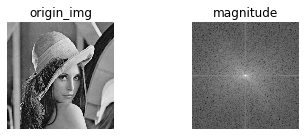

In [2]:
origin_img = cv2.imread('lenna.bmp', 0).astype(np.float32) # gray scale 0.0-255
origin_img = origin_img / 255      #0.0~1.0
 
fft = cv2.dft(origin_img, flags=cv2.DFT_COMPLEX_OUTPUT)   #(dft:임의 영상에서 한다는거, dft: 복소수값)

# 임의 영상이 fft 변환 완료, fft: 주파수는 고정되어있으니, 주파수의 크기가 들어잇는거

# 영상에서 미분한것의 크기: 1차 미분한 것의 변화량 dx dy. 절대값취하거나 제곱해서 스퀘어루트 취하거나: 
# 영상은 뭐든지 x값y값 두개를 가지니까 그 크기를계산하라는 말은 무조건 0보다 큰값. 엣지는 방향이 있어서 마이너스가 있음

shifted = np.fft.fftshift(fft, axes=[0,1])
magnitude = cv2.magnitude(shifted[:,:,0], shifted[:,:,1])
magnitude = np.log(magnitude)


plt.figure(figsize=(8,2))
plt.subplot(131)
plt.axis('off')
plt.title('origin_img')
plt.imshow(origin_img, cmap='gray')
plt.subplot(132)
plt.axis('off')
plt.title('magnitude')
plt.imshow(magnitude, cmap='gray')
plt.tight_layout()

In [17]:
origin_img = cv2.imread('ft01.png', 0).astype(np.float32) # gray scale 0.0-255
origin_img = origin_img / 255      #0.0~1.0
print(origin_img.shape)
fft = cv2.dft(origin_img, flags=cv2.DFT_COMPLEX_OUTPUT)

print(fft.shape)
print(fft)
# (10, 10, 2): 한 픽셀에서 주파수의 위상, 크기 2개의 값을 나타낸다. (복소수)

(100, 100)
(100, 100, 2)
[[[ 4.9034512e+03  0.0000000e+00]
  [-2.0542574e+00  3.1793569e+03]
  [-1.0090228e+02  3.0878153e+00]
  ...
  [ 2.8350377e+00 -1.0569513e+03]
  [-1.0090228e+02 -3.0878153e+00]
  [-2.0542574e+00 -3.1793569e+03]]

 [[-1.5044162e+00  2.4595094e+00]
  [ 2.7740192e+00  2.7860478e-02]
  [-1.3756493e+00 -2.4140670e+00]
  ...
  [-2.3882339e+00  2.2831182e+00]
  [ 3.1751857e+00  5.3229934e-01]
  [-1.3224380e+00 -2.7561705e+00]]

 [[-6.1612028e-01 -2.8738558e+00]
  [-2.1018019e+00  2.2943399e+00]
  [ 3.1875000e+00  3.0819795e-01]
  ...
  [-3.6252356e-01 -2.5694792e+00]
  [-2.0603175e+00  1.6127679e+00]
  [ 2.5655665e+00  9.8669523e-01]]

 ...

 [[ 2.8657660e+00 -7.0744467e-01]
  [-2.3515592e+00 -1.8730934e+00]
  [-4.2582549e-02  2.9424000e+00]
  ...
  [ 2.4029989e+00 -4.5505255e-02]
  [-1.4085552e+00 -2.1740677e+00]
  [-1.0757973e+00  2.5817845e+00]]

 [[-6.1612034e-01  2.8738561e+00]
  [ 2.5655665e+00 -9.8669523e-01]
  [-2.0603175e+00 -1.6127679e+00]
  ...
  [-1.6875187

In [18]:
shifted = np.fft.fftshift(fft, axes=[0,1])
print(shifted.shape)
print(shifted) #값은 동일하나 순서가 바뀌었음

(100, 100, 2)
[[[ 0.          0.        ]
  [ 0.0039196  -0.00406456]
  [-0.00978005  0.00015781]
  ...
  [ 0.00761318 -0.00831557]
  [-0.00978005 -0.00015781]
  [ 0.0039196   0.00406456]]

 [[ 0.          0.        ]
  [ 0.00321691  0.00212101]
  [ 0.00140554 -0.00579765]
  ...
  [ 0.01948055  0.0053268 ]
  [-0.00651182 -0.01167789]
  [-0.00182647  0.00581479]]

 [[ 0.          0.        ]
  [-0.00632895  0.00011697]
  [ 0.00893276  0.01186897]
  ...
  [-0.00456924  0.01897192]
  [ 0.01043896 -0.00324029]
  [-0.00318942 -0.00376066]]

 ...

 [[ 0.          0.        ]
  [ 0.00959454  0.00031296]
  [-0.00981967 -0.01397936]
  ...
  [ 0.02465528 -0.00932735]
  [-0.01672772 -0.01017542]
  [ 0.00152792  0.01020175]]

 [[ 0.          0.        ]
  [-0.00318942  0.00376066]
  [ 0.01043896  0.00324029]
  ...
  [ 0.00559187  0.02397106]
  [ 0.00893276 -0.01186897]
  [-0.00632895 -0.00011697]]

 [[ 0.          0.        ]
  [-0.00182647 -0.00581479]
  [-0.00651182  0.01167789]
  ...
  [-0.0094

(100, 100)
[[      -inf -5.1767044 -4.62728   ... -4.485232  -4.62728   -5.1767044]
 [      -inf -5.558851  -5.121747  ... -3.902285  -4.314686  -5.100304 ]
 [      -inf -5.0624504 -4.209429  ... -3.936603  -4.516217  -5.3122096]
 ...
 [      -inf -4.646029  -4.069638  ... -3.6358843 -3.9332733 -4.574105 ]
 [      -inf -5.3122096 -4.516217  ... -3.7044137 -4.209429  -5.0624504]
 [      -inf -5.100304  -4.314686  ... -4.6610007 -5.121747  -5.558851 ]]


C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


AttributeError: 'AxesImage' object has no property 'camp'

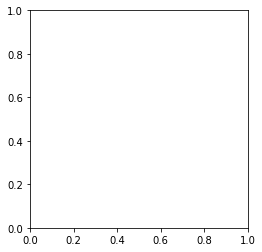

In [19]:
magnitude = cv2.magnitude(shifted[:,:,0], shifted[:,:,1])
# shifted[:,:,0] - 지수부, shifted[:,:,1]- 허수부
# magnitude 크기 계산함수
magnitude = np.log(magnitude)
print(magnitude.shape)
print(magnitude)
plt.imshow(magnitude, camp='gray')
print(np.min(magnitude))
print(np.max(magnitude))
np.log(np.max(magnitude))

In [20]:
magnitude= np.log(magnitude+1)  # log0일때 마이너스 무한대 없애주려고 1 더함 - 에러

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


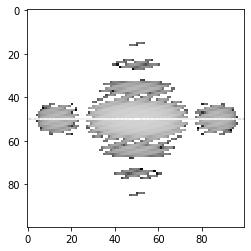

In [21]:
plt.imshow(magnitude, cmap='gray')

In [38]:
origin_img = cv2.imread('ft05.png', 0).astype(np.float32) # gray scale
origin_img = origin_img / 255
print(origin_img.shape)
fft = cv2.dft(origin_img, flags=cv2.DFT_COMPLEX_OUTPUT)

print(fft.shape)
#print(fft)

(100, 100)
(100, 100, 2)


(100, 100, 2)
(100, 100)
0.09482227
8443.0


9.041093

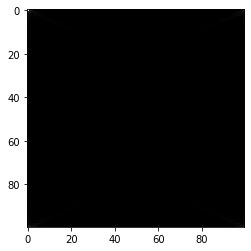

In [42]:
# shifted = np.fft.fftshift(fft, axes=[0,1])
shifted= fft # shift 없이 해보면 값이 맨위로 몰려버림
# 특정 주파수 제거하거나 강조함으로써 계산하고 싶은 값 구함

print(shifted.shape)
#print(shifted)
magnitude = cv2.magnitude(shifted[:,:,0], shifted[:,:,1])

print(magnitude.shape)
#print(magnitude)
plt.imshow(magnitude, cmap='gray')
print(np.min(magnitude))
print(np.max(magnitude))
np.log(np.max(magnitude))

In [43]:
magnitude = np.log(magnitude+1)

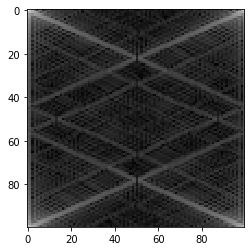

In [44]:
plt.imshow(magnitude, cmap="gray")

#### 기본코드
img = cv2.imread('lenna.bmp',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows, cols = img.shape
crow,ccol = int(rows/2), int(cols/2)

mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1


fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [53]:
img = cv2.imread('lenna.bmp',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows, cols = img.shape
crow,ccol = int(rows/2), int(cols/2)

mask = np.zeros((rows,cols,2),np.uint8) #2인 이유?
mask[crow-30:crow+30, ccol-30:ccol+30] = 1  # 30 바꿔서 정도 대체

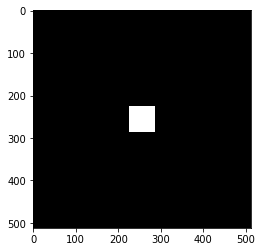

In [54]:
plt.imshow(mask[:,:,0], cmap="gray")  #[:,:,0], [:,:,1]

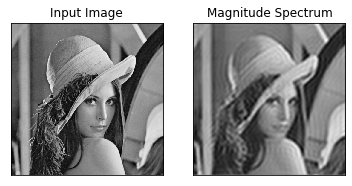

In [55]:
fshift = dft_shift*mask  # 가운데만 남기고 나머지 주파수는 0으로 제거해버리는거: 주파수 처리한거

f_ishift = np.fft.ifftshift(fshift) #이미지도메인으로 변환위해 ifftshift shift한거 되돌리는거
img_back = cv2.idft(f_ishift) # (inverse) 
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1]) # 마스크 성분 0으로 제거했기 때문에 날카로운 고주파 성분이 빠진 이미지가 됨



plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

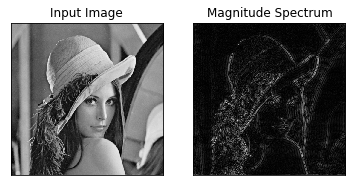

In [56]:
mask = np.zeros((rows,cols,2),np.uint8) 
mask[crow-30:crow+30, ccol-30:ccol+30] = 1  
mask= 1- mask # 앞의 것 반대로 하면 

plt.imshow(mask[:,:,0], cmap="gray") 
fshift = dft_shift*mask  

f_ishift = np.fft.ifftshift(fshift) #이미지도메인으로 변환위해 ifftshift shift한거 되돌리는거
img_back = cv2.idft(f_ishift) # (inverse)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1]) 


plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [68]:
mask = np.zeros((rows,cols,2),np.uint8) 
mask0= cv2.imread('mask01.png',0)/255
mask[:,:,0]= mask0
mask[:,:,1]= mask0

mask= np.dstack((mask0, mask0))

ValueError: could not broadcast input array from shape (100,100) into shape (512,512)

In [73]:
# log 잘 모르겠을 때 이런식으로 확인해서 보기
a= np.array([0.00000001, 1, 10, 20, 30])
np.log(a)
b= a+1
print(b)
print(np.log(b))

[ 1.00000001  2.         11.         21.         31.        ]
[9.99999989e-09 6.93147181e-01 2.39789527e+00 3.04452244e+00
 3.43398720e+00]


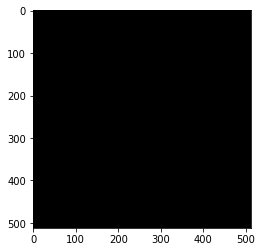

In [74]:
plt.imshow(mask[:,:,1], cmap="gray")